# Predicting Algae Blooms

Adapted from: Luis Torgo, Data Mining with R, http://www.dcc.fc.up.pt/~ltorgo/DataMiningWithR

## Preconditions

(1) Install r-essentials from anaconda:

conda install -c r r-essentials

(2) Make sure the following packages are installed under $ANACONDA_PATH/lib/R/library:
- lattice
- grid
- abind
- gtools
- gdata
- gplots
- ROCR
- DMwR
- HMisc
- Formula
- acepack
- latticeExtra
- gridExtra

## Load and inspect the data

In [49]:
library("DMwR")

In [50]:
data(algae)

In [51]:
algae

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
1,winter,small,medium,8,9.8,60.8,6.238,578,105,170,50,0,0,0,0,34.2,8.3,0
2,spring,small,medium,8.35,8,57.75,1.288,370,428.75,558.75,1.3,1.4,7.6,4.8,1.9,6.7,0,2.1
3,autumn,small,medium,8.1,11.4,40.02,5.33,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0,0,0,9.7
4,spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.7,1.4,3.1,41,18.9,0,1.4,0,1.4
5,autumn,small,medium,8.06,9,55.35,10.416,233.7,58.222,97.58,10.5,9.2,2.9,7.5,0,7.5,4.1,1
6,winter,small,high,8.25,13.1,65.75,9.248,430,18.25,56.667,28.4,15.1,14.6,1.4,0,22.5,12.6,2.9
7,summer,small,high,8.15,10.3,73.25,1.535,110,61.25,111.75,3.2,2.4,1.2,3.2,3.9,5.8,6.8,0
8,autumn,small,high,8.05,10.6,59.067,4.99,205.66701,44.667,77.434,6.9,18.2,1.6,0,0,5.5,8.7,0
9,winter,small,medium,8.7,3.4,21.95,0.886,102.75,36.3,71,5.544,25.4,5.4,2.5,0,0,0,0
10,winter,small,high,7.93,9.9,8,1.39,5.8,27.25,46.6,0.8,17,0,0,2.9,0,0,1.7


In [52]:
summary(algae)

    season       size       speed         mxPH            mnO2       
 autumn:40   large :45   high  :84   Min.   :5.600   Min.   : 1.500  
 spring:53   medium:84   low   :33   1st Qu.:7.700   1st Qu.: 7.725  
 summer:45   small :71   medium:83   Median :8.060   Median : 9.800  
 winter:62                           Mean   :8.012   Mean   : 9.118  
                                     3rd Qu.:8.400   3rd Qu.:10.800  
                                     Max.   :9.700   Max.   :13.400  
                                     NA's   :1       NA's   :2       
       Cl               NO3              NH4                oPO4       
 Min.   :  0.222   Min.   : 0.050   Min.   :    5.00   Min.   :  1.00  
 1st Qu.: 10.981   1st Qu.: 1.296   1st Qu.:   38.33   1st Qu.: 15.70  
 Median : 32.730   Median : 2.675   Median :  103.17   Median : 40.15  
 Mean   : 43.636   Mean   : 3.282   Mean   :  501.30   Mean   : 73.59  
 3rd Qu.: 57.824   3rd Qu.: 4.446   3rd Qu.:  226.95   3rd Qu.: 99.33  
 Max.   

## Data Visualization

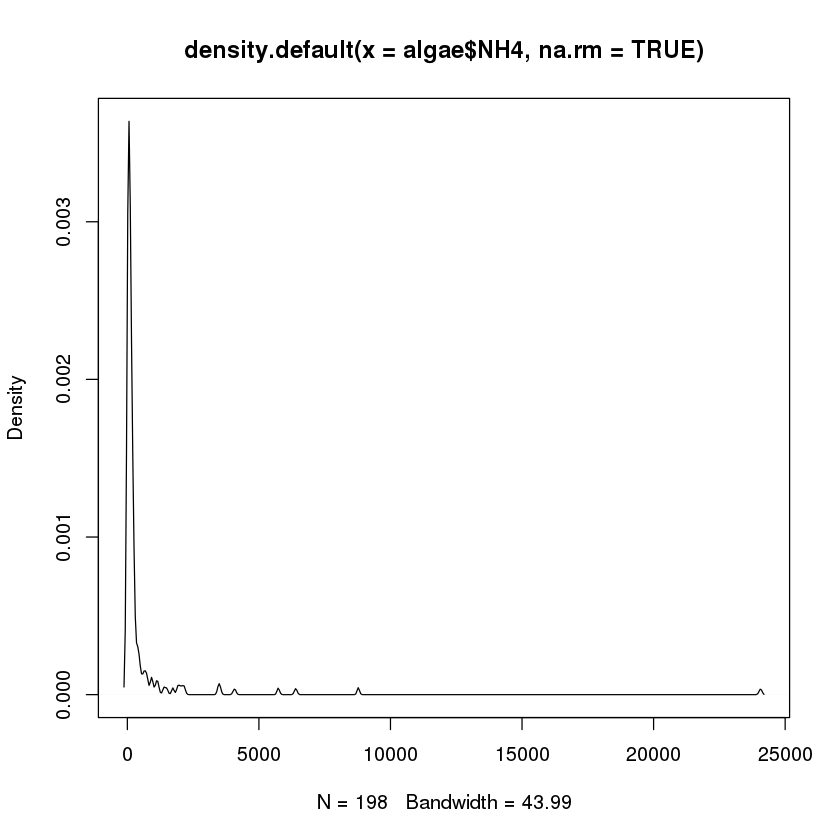

In [54]:
plot(density(algae$NH4, na.rm = TRUE))

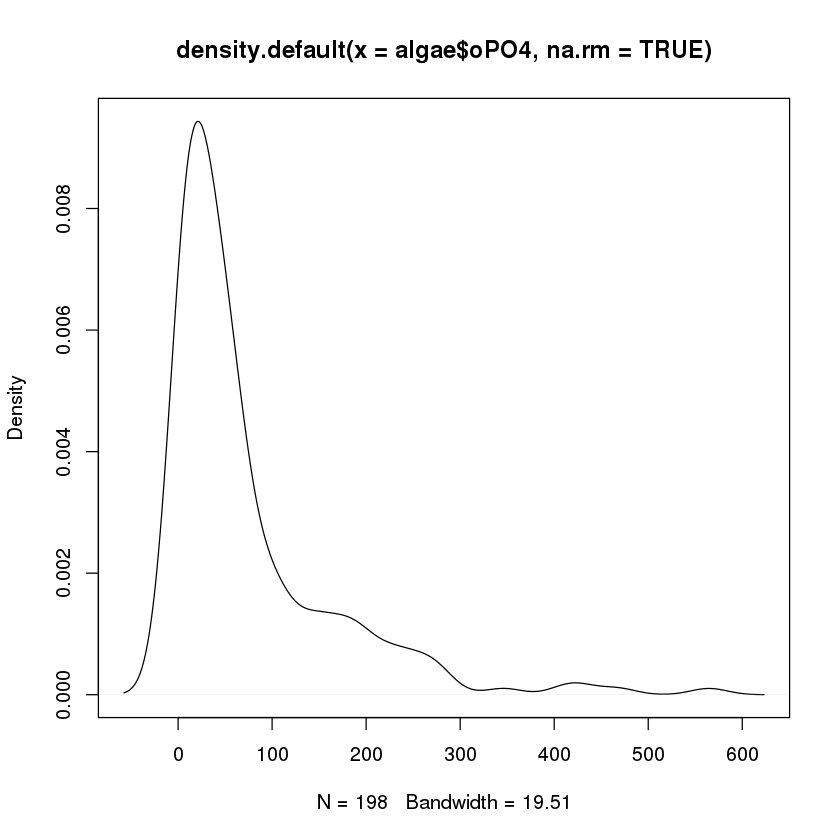

In [55]:
plot(density(algae$oPO4, na.rm = TRUE))

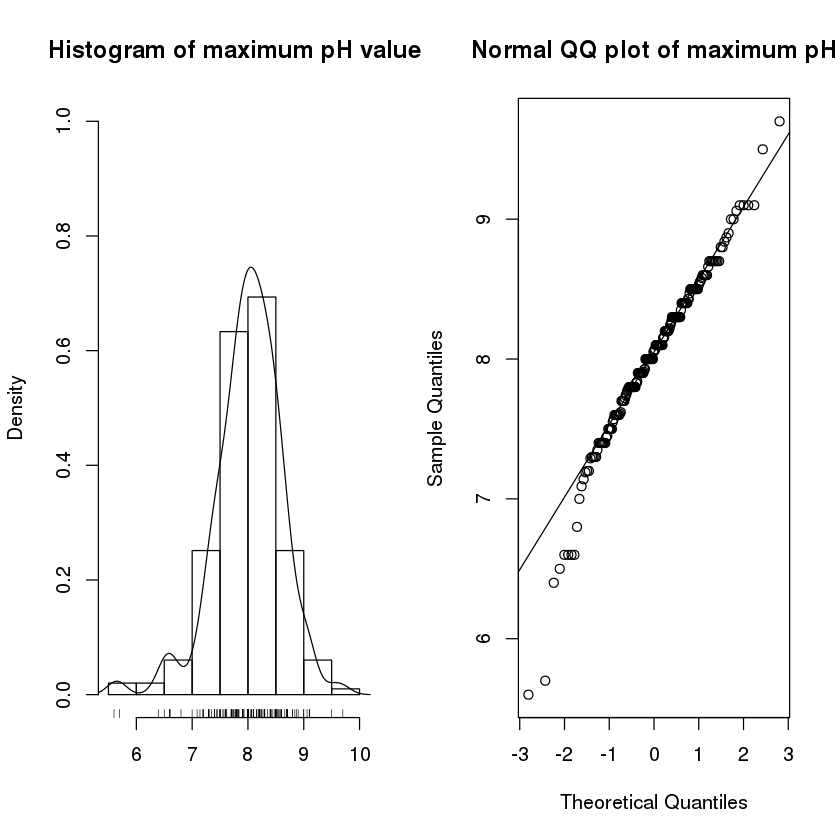

In [56]:
par(mfrow=c(1,2))
hist(algae$mxPH, prob=T, xlab='', main='Histogram of maximum pH value',ylim=0:1)
lines(density(algae$mxPH,na.rm=T))
rug(jitter(algae$mxPH))
qqnorm(algae$mxPH,main='Normal QQ plot of maximum pH')
qqline(algae$mxPH)

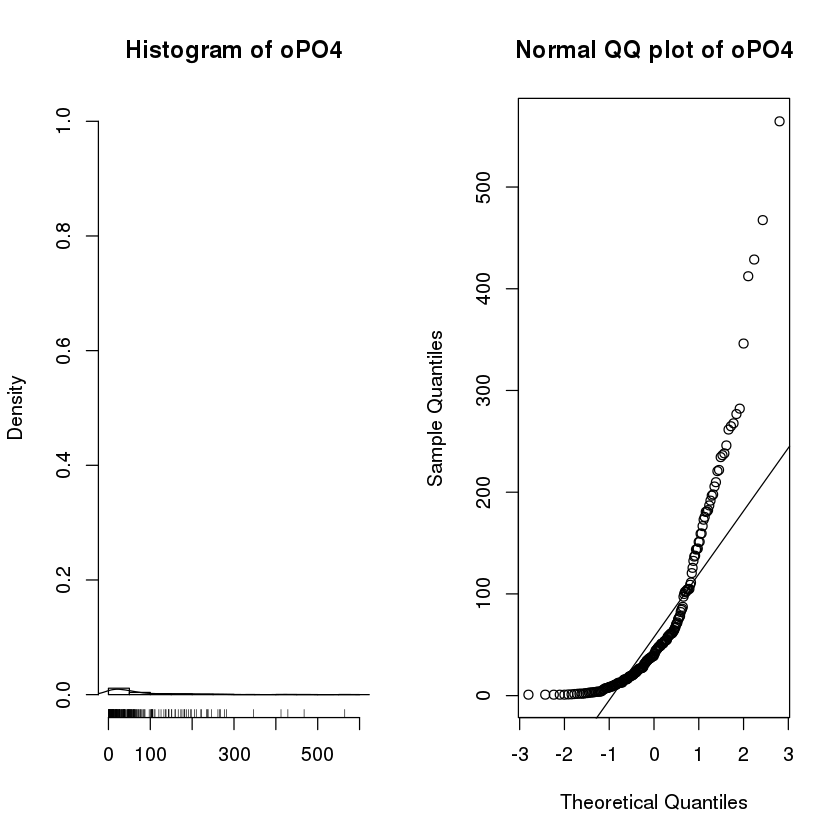

In [57]:
par(mfrow=c(1,2))
hist(algae$oPO4, prob=T, xlab='', main='Histogram of oPO4',ylim=0:1)
lines(density(algae$oPO4,na.rm=T))
rug(jitter(algae$oPO4))
qqnorm(algae$oPO4,main='Normal QQ plot of oPO4')
qqline(algae$oPO4)

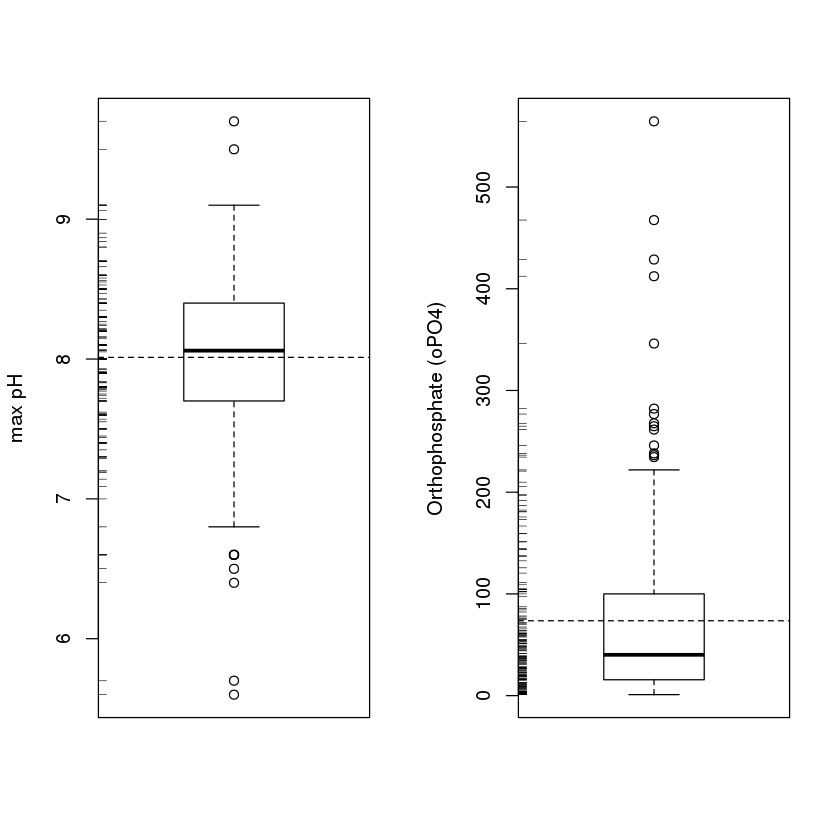

In [58]:
par(mfrow=c(1,2))
boxplot(algae$mxPH, ylab="max pH")
rug(jitter(algae$mxPH), side=2)
abline(h=mean(algae$mxPH, na.rm=T), lty=2)
boxplot(algae$oPO4,ylab='Orthophosphate (oPO4)')
rug(jitter(algae$oPO4),side=2)
abline(h=mean(algae$oPO4,na.rm=T),lty=2)

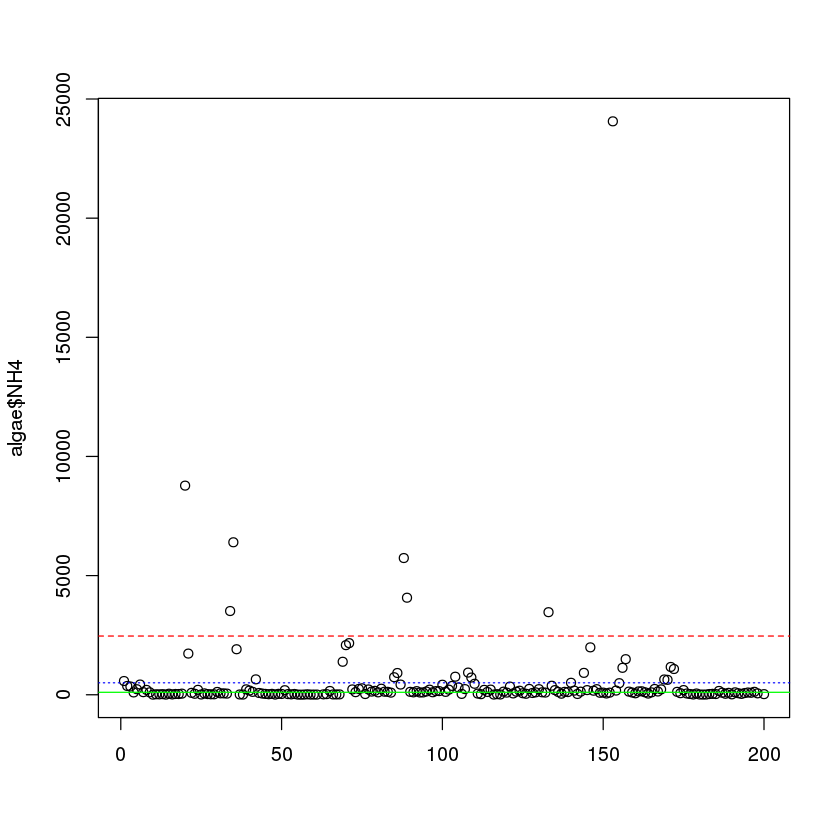

In [59]:
plot(algae$NH4,xlab='')
abline(h=mean(algae$NH4,na.rm=T),lty=3, col='blue')
abline(h=mean(algae$NH4,na.rm=T)+sd(algae$NH4,na.rm=T),lty=2, col='red')
abline(h=median(algae$NH4,na.rm=T),lty=1, col='green')

In [60]:
algae[algae$NH4 > 19000,]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
153,autumn,medium,high,7.3,11.8,44.205,45.65,24064,44,34,53.1,2.2,0,0,1.2,5.9,77.6,0
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


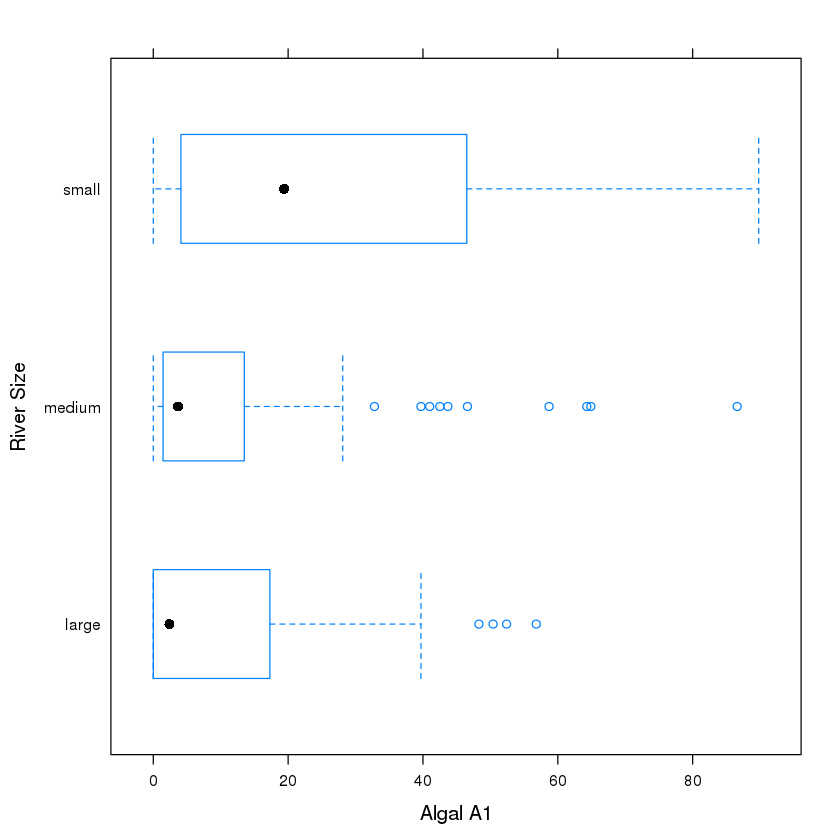

In [61]:
# box-and-whisker plot from lattice library
bwplot(size ~ a1, data=algae,ylab='River Size',xlab='Algal A1')

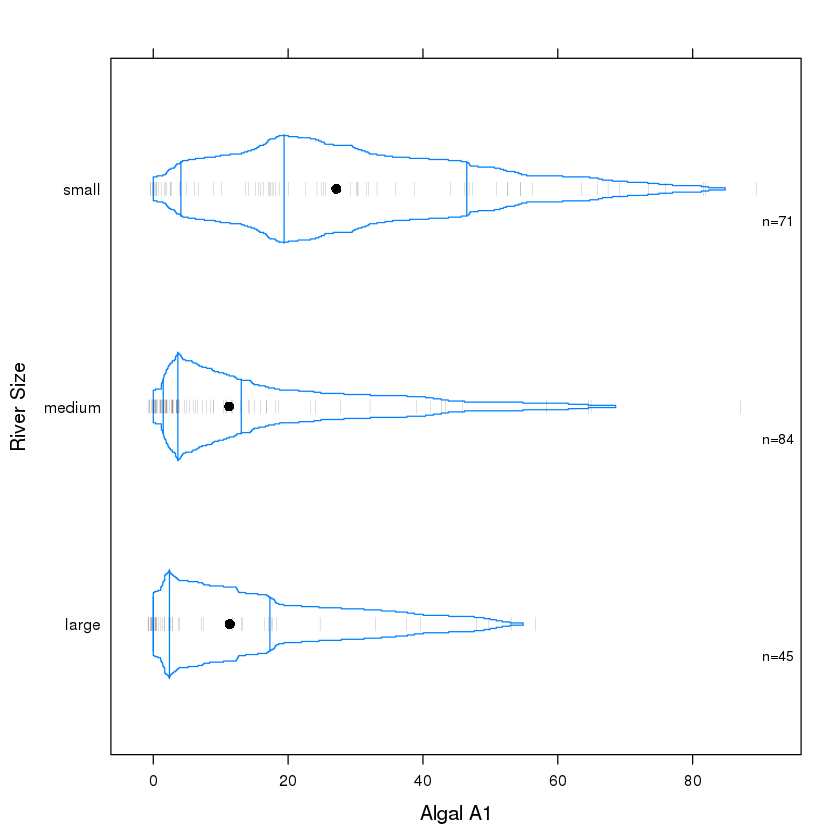

In [62]:
library(Hmisc)
bwplot(size ~ a1, data=algae,panel=panel.bpplot, probs=seq(.01,.49,by=.01), datadensity=TRUE, ylab='River Size',xlab='Algal A1')

In [63]:
# from: lattice
minO2 <- equal.count(na.omit(algae$mnO2), number=4,overlap=1/5)
minO2


Data:
  [1]  9.80  8.00 11.40  4.80  9.00 13.10 10.30 10.60  3.40  9.90 10.20 11.70
 [13]  9.60 11.80  9.60 11.50 12.00  9.80 10.40  3.20 10.70  9.20 10.30  8.50
 [25]  9.40 10.70  8.40 11.10  9.80 11.30 12.50 10.30 11.30  9.90  7.80  8.40
 [37] 10.90  8.90 10.50  5.50  7.10  7.70  8.80 13.40 12.50 12.10 12.60  9.60
 [49] 11.21 10.20  7.90 11.00  9.00 10.80 11.80 10.80  9.50 10.80 11.30 10.40
 [61] 11.70 10.80 11.70 10.10  9.80 12.10  1.50  1.80  7.10  8.10 10.20  8.10
 [73]  6.80  9.40  9.80  5.90  3.30  9.20  9.80 11.70  8.90 11.17 10.80  6.00
 [85] 10.77  3.60  9.70  8.60  9.40 10.70  8.50 10.50 11.80 10.50  5.40  4.50
 [97]  6.30  8.20  7.10  6.50  5.30  8.80 10.00  7.40 11.10 11.10  6.00 11.10
[109]  9.80 11.30 11.80  6.00  9.70 10.80 11.62 11.60  5.30  6.60  9.40  7.10
[121]  9.00 10.70  9.70 10.70 11.60  6.90 10.00 10.10  7.70 10.50  9.80  8.30
[133] 11.90  9.20 11.70  9.90  6.20 11.20  6.20  9.50 10.50  4.50  6.30  6.50
[145]  8.10  9.90  9.00  4.90 11.00  4.40 11.80  6.00 10.

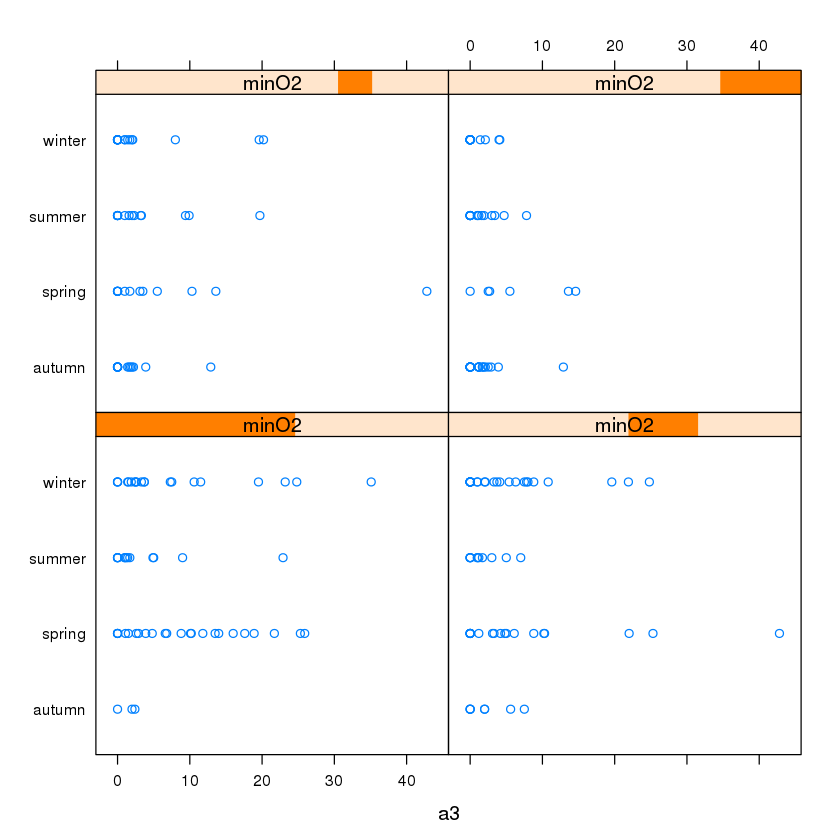

In [64]:
stripplot(season ~ a3|minO2, data=algae[!is.na(algae$mnO2),])

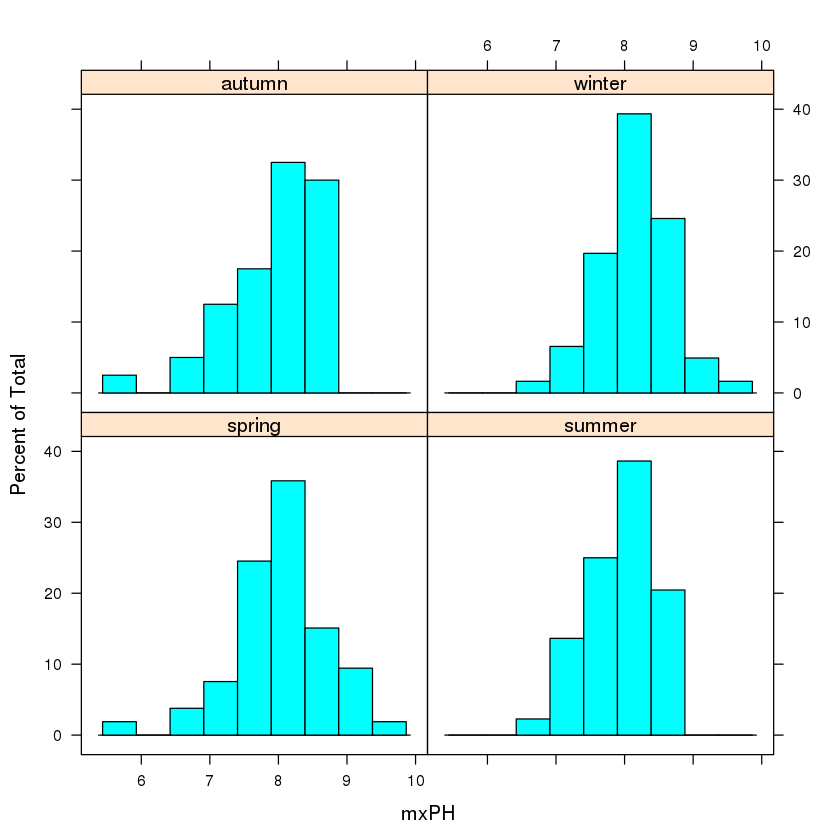

In [123]:
histogram(~ mxPH | season,data=algae)

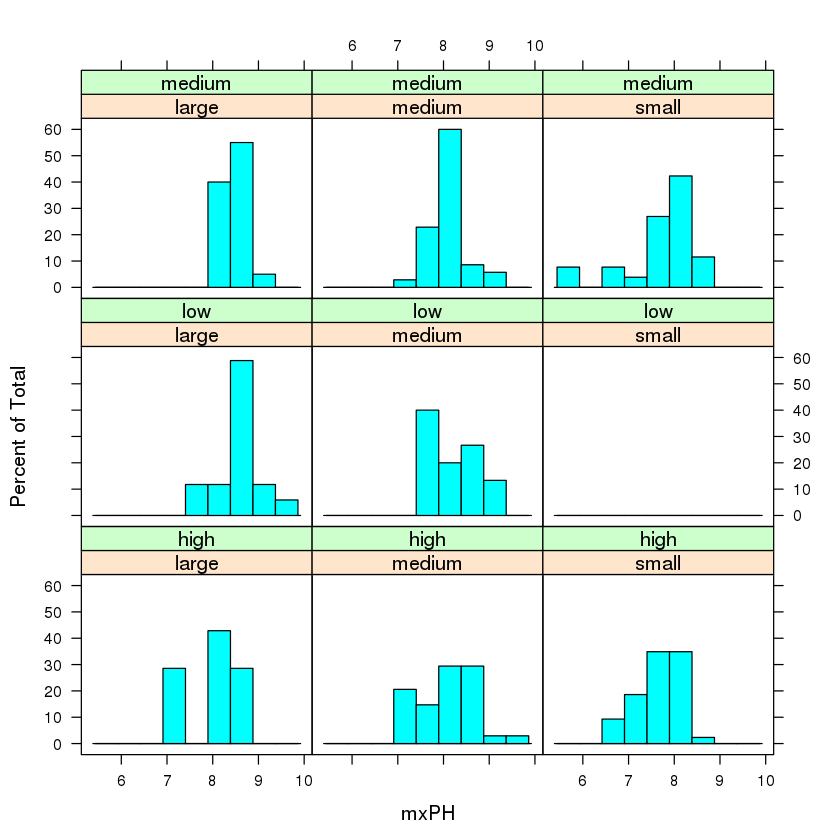

In [125]:
histogram(~ mxPH | size*speed,data=algae) 

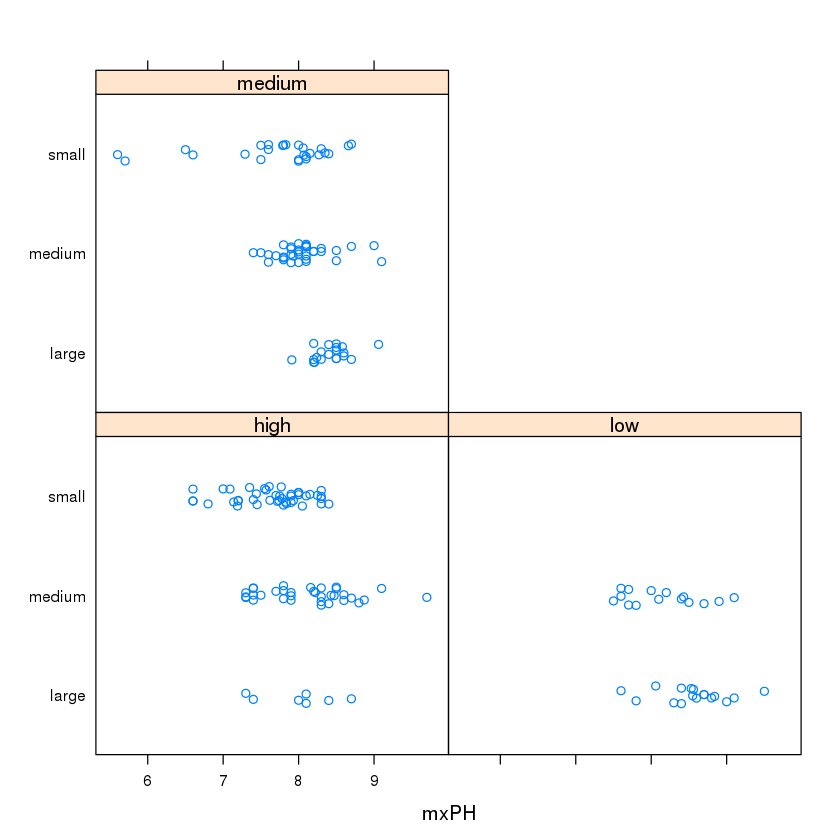

In [126]:
stripplot(size ~ mxPH | speed, data=algae, jitter=T)

## Handling missing data

In [99]:
# reload dataset
data(algae)
algae[!complete.cases(algae),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
28,autumn,small,high,6.8,11.1,9,0.63,20,4,NA,2.7,30.3,1.9,0,0,2.1,1.4,2.1
38,spring,small,high,8,NA,1.45,0.81,10,2.5,3,0.3,75.8,0,0,0,0,0,0
48,winter,small,low,NA,12.6,9,0.23,10,5,6,1.1,35.5,0,0,0,0,0,0
55,winter,small,high,6.6,10.8,NA,3.245,10,1,6.5,NA,24.3,0,0,0,0,0,0
56,spring,small,medium,5.6,11.8,NA,2.22,5,1,1,NA,82.7,0,0,0,0,0,0
57,autumn,small,medium,5.7,10.8,NA,2.55,10,1,4,NA,16.8,4.6,3.9,11.5,0,0,0
58,spring,small,high,6.6,9.5,NA,1.32,20,1,6,NA,46.8,0,0,28.8,0,0,0
59,summer,small,high,6.6,10.8,NA,2.64,10,2,11,NA,46.9,0,0,13.4,0,0,0
60,autumn,small,medium,6.6,11.3,NA,4.17,10,1,6,NA,47.1,0,0,0,0,1.2,0
61,spring,small,medium,6.5,10.4,NA,5.97,10,2,14,NA,66.9,0,0,0,0,0,0


In [100]:
nrow(algae[!complete.cases(algae),])

[1] 16

### Way 1: Remove all rows with missing data

In [101]:
algae <- na.omit(algae)
nrow(algae)

[1] 184

### Way 2: Handle rows individually

#### Step 1: First remove all rows with higher than x percentage of NAs

In [105]:
# reload dataset
data(algae)
apply(algae,1,function(x) sum(is.na(x)))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [38] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 6 1 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0

In [106]:
# from: DMwR
# return rows with more tha p2 proportion of NAs
manyNAs(algae,0.2)

[1]  62 199

In [107]:
algae <- algae[-c(62,199),]
nrow(algae)

[1] 198

In [108]:
# reload dataset
data(algae)
# alternative to the above
algae <- algae[-manyNAs(algae),]
nrow(algae)

[1] 198

#### Step 2: Fill missing rows with central statistic (mean, median, mode)

In [110]:
algae[48,'mxPH'] <- mean(algae$mxPH,na.rm=T)
algae[48,]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
48,winter,small,low,8.01997461928934,12.6,9,0.23,10,5,6,1.1,35.5,0,0,0,0,0,0


In [111]:
algae[is.na(algae$Chla),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
55,winter,small,high,6.6,10.8,NA,3.245,10,1,6.5,NA,24.3,0,0,0,0,0,0
56,spring,small,medium,5.6,11.8,NA,2.22,5,1,1,NA,82.7,0,0,0,0,0,0
57,autumn,small,medium,5.7,10.8,NA,2.55,10,1,4,NA,16.8,4.6,3.9,11.5,0,0,0
58,spring,small,high,6.6,9.5,NA,1.32,20,1,6,NA,46.8,0,0,28.8,0,0,0
59,summer,small,high,6.6,10.8,NA,2.64,10,2,11,NA,46.9,0,0,13.4,0,0,0
60,autumn,small,medium,6.6,11.3,NA,4.17,10,1,6,NA,47.1,0,0,0,0,1.2,0
61,spring,small,medium,6.5,10.4,NA,5.97,10,2,14,NA,66.9,0,0,0,0,0,0
63,autumn,small,high,7.83,11.7,4.083,1.328,18,3.333,6.667,NA,14.4,0,0,0,0,0,0
116,winter,medium,high,9.7,10.8,0.222,0.406,10,22.444,10.111,NA,41,1.5,0,0,0,0,0
184,winter,large,high,8,10.9,9.055,0.825,40,21.083,56.091,NA,16.8,19.6,4,0,0,0,0


In [112]:
algae[is.na(algae$Chla),'Chla'] <- median(algae$Chla,na.rm=T)
algae[55:61,'Chla']

[1] 5.475 5.475 5.475 5.475 5.475 5.475 5.475

In [113]:
#reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
# from: DMwR
algae <- centralImputation(algae)
algae[!complete.cases(algae),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7


#### Step 2 - alternative: Use existing correlations to impute values

In [114]:
cor(algae[,4:18],use="complete.obs")

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
mxPH,1.00000000,-0.16749178,0.13285681,-0.13103951,-0.09360612,0.15850785,0.18033494,0.39121495,-0.26823725,0.32584814,0.03077250,-0.24876290,-0.01697947,-0.08388657,-0.08726106
mnO2,-0.16749178,1.00000000,-0.27873229,0.09837676,-0.08780541,-0.41655069,-0.48772564,-0.16678069,0.28389830,-0.09935631,-0.25155437,-0.31513753,0.17008979,0.15864906,-0.12117098
Cl,0.13285681,-0.27873229,1.00000000,0.22504071,0.07407466,0.39230733,0.45652107,0.15082753,-0.36078101,0.08949837,0.09429722,0.12045912,0.16514900,0.18369968,-0.02793640
NO3,-0.13103951,0.09837676,0.22504071,1.00000000,0.72144352,0.14458782,0.16931401,0.14290962,-0.24121109,0.02368832,-0.07621407,-0.02578257,0.22359794,0.54640569,0.08509789
NH4,-0.09360612,-0.08780541,0.07407466,0.72144352,1.00000000,0.22723723,0.20844445,0.09375115,-0.13265601,-0.02968344,-0.10143974,0.22822914,0.02745909,0.40571045,-0.01672691
oPO4,0.15850785,-0.41655069,0.39230733,0.14458782,0.22723723,1.00000000,0.91387767,0.12941615,-0.41735761,0.14768993,0.03362906,0.29574585,0.15147500,0.02876159,0.04849832
PO4,0.18033494,-0.48772564,0.45652107,0.16931401,0.20844445,0.91387767,1.00000000,0.26758873,-0.48730097,0.16246963,0.06587312,0.30462623,0.19111521,0.08316987,0.10671057
Chla,0.39121495,-0.16678069,0.15082753,0.14290962,0.09375115,0.12941615,0.26758873,1.00000000,-0.28380049,0.38192280,-0.04975884,-0.08364618,-0.05945318,0.01815732,0.02405581
a1,-0.26823725,0.28389830,-0.36078101,-0.24121109,-0.13265601,-0.41735761,-0.48730097,-0.28380049,1.00000000,-0.29251967,-0.14695028,-0.03892441,-0.29503346,-0.27602608,-0.21142489
a2,0.32584814,-0.09935631,0.08949837,0.02368832,-0.02968344,0.14768993,0.16246963,0.38192280,-0.29251967,1.00000000,0.03031095,-0.17168171,-0.16186215,-0.11613061,0.04749242


In [115]:
symnum(cor(algae[,4:18],use="complete.obs"))

     mP mO Cl NO NH o P Ch a1 a2 a3 a4 a5 a6 a7
mxPH 1                                         
mnO2    1                                      
Cl         1                                   
NO3           1                                
NH4           ,  1                             
oPO4    .  .        1                          
PO4     .  .        * 1                        
Chla .                  1                      
a1         .        . .    1                   
a2   .                  .     1                
a3                               1             
a4      .             .             1          
a5                                     1       
a6            .  .                     .  1    
a7                                           1 
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [117]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
lm(PO4 ~ oPO4,data=algae)


Call:
lm(formula = PO4 ~ oPO4, data = algae)

Coefficients:
(Intercept)         oPO4  
     42.897        1.293  


In [118]:
algae[28,'PO4'] <- 42.897 + 1.293 * algae[28,'oPO4']

In [119]:
data(algae)
algae <- algae[-manyNAs(algae),]
fillPO4 <- function(oP) {
   if (is.na(oP)) return(NA)
   else return(42.897 + 1.293 * oP)
}
algae[is.na(algae$PO4),'PO4'] <- 
    sapply(algae[is.na(algae$PO4),'oPO4'],fillPO4)

#### Step 2 - another alternative: use similar rows to impute values

In [129]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
algae <- knnImputation(algae,k=10)

In [128]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
algae <- knnImputation(algae,k=10,meth='median')

## Linear Regression

In [130]:
# start afresh
data(algae)
algae <- algae[-manyNAs(algae), ]
clean.algae <- knnImputation(algae, k = 10)